In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier


In [2]:
train_f = pd.read_csv("../train_features.csv")
test_f = pd.read_csv("../test_features.csv")
train_l = pd.read_csv("../train_labels.csv")

In [3]:
pd.options.display.max_columns = None

In [5]:
x = pd.concat([train_f,train_l["charged_off"]], axis=1)

In [6]:
x.head()

,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,disbursement_method,charged_off
0,43373,NaN,12000,12000,36 months,16.02%,422.01,C,C5,Driver,4 years,MORTGAGE,81000.0,NaN,NaN,debt_consolidation,Debt consolidation,280xx,NC,12.76,0,Dec-2005,1,48.0,NaN,7,0,4912,23.5%,15,w,0,48.0,Individual,NaN,NaN,0,0,174783,1,2,0,4,13.0,33668,82.0,2,5,2962,63.0,20900,1,1,2,9,24969.0,588.0,89.3,0,0,145.0,23,1,1,1,8.0,NaN,1.0,NaN,2,2,2,2,2,9,4,5,2,7,0.0,0,0,2,92.9,100.0,0,0,206618,38580,5500,40863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,0
1,24414,NaN,6300,6300,36 months,14.07%,215.54,C,C3,GMP Lead,4 years,RENT,39000.0,NaN,NaN,debt_consolidation,Debt consolidation,920xx,CA,21.42,0,Mar-2012,1,NaN,NaN,10,0,11876,59.4%,12,w,0,NaN,Individual,NaN,NaN,0,0,31046,0,1,0,2,14.0,19170,83.0,3,8,5153,72.0,20000,1,0,1,10,3105.0,6877.0,59.3,0,0,17.0,72,8,8,0,8.0,NaN,6.0,NaN,0,6,7,7,8,2,9,10,7,10,0.0,0,0,3,100.0,42.9,0,0,43140,31046,16900,23140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,0
2,46723,NaN,4500,4500,36 months,7.21%,139.38,A,A3,Accounts,3 years,RENT,78000.0,NaN,NaN,debt_consolidation,Debt consolidation,906xx,CA,2.17,0,May-2000,2,NaN,NaN,13,0,1715,5.2%,19,w,0,NaN,Individual,NaN,NaN,0,0,35329,0,8,1,2,10.0,33614,106.0,1,1,1196,54.0,33300,4,0,3,3,2718.0,21585.0,7.4,0,0,166.0,218,10,10,0,31.0,NaN,1.0,NaN,0,3,3,3,4,13,5,6,3,13,0.0,0,0,2,100.0,0.0,0,0,65092,35329,23300,31792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,0
3,24878,NaN,12000,12000,36 months,9.44%,384.06,B,B1,Client Processing Associate,10+ years,MORTGAGE,62000.0,NaN,NaN,debt_consolidation,Debt consolidation,441xx,OH,13.76,0,Feb-2003,0,NaN,NaN,22,0,9404,16.3%,33,w,0,NaN,Individual,NaN,NaN,0,0,75160,4,1,0,2,13.0,17123,67.0,6,9,6898,32.0,57600,3,1,2,12,3579.0,33602.0,17.0,0,0,162.0,179,1,1,1,1.0,NaN,5.0,NaN,0,1,3,9,13,7,20,25,3,22,0.0,0,0,7,100.0,0.0,0,0,133065,26527,40500,25465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,0
4,39038,NaN,12000,12000,36 months,22.35%,460.47,D,D5,Construction Operator,10+ years,MORTGAGE,70000.0,NaN,NaN,debt_consolidation,Debt consolidation,751xx,TX,14.04,4,Nov-2001,2,13.0,NaN,18,0,17895,24.2%,45,w,0,13.0,Individual,NaN,NaN,0,7218,113702,9,2,2,4,6.0,16711,68.0,9,10,5373,35.0,73900,3,6,3,14,6317.0,32863.0,24.1,0,0,159.0,201,0,0,1,0.0,62.0,3.0,62.0,6,9,11,11,14,22,15,20,11,18,0.0,0,2,11,82.2,9.1,0,0,192842,34606,43300,24499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,0


In [7]:
x["delinq_2yrs"].value_counts()

0     32059
1      4010
2       968
3       363
4       170
5        74
6        34
7        22
8        16
9         8
12        7
10        5
11        3
18        2
15        2
17        1
19        1
Name: delinq_2yrs, dtype: int64

In [8]:
x["int_rate"] = x["int_rate"].str.replace(r'%',r'').astype('float')
x["revol_util"] = x["revol_util"].str.replace(r'%',r'').astype('float')
x["term"] = x["term"].str.replace(r'months',r'').astype('float')
x["emp_length"] = x["emp_length"].str.replace(r' years',r'')
x["emp_length"] = x["emp_length"].str.replace(r' year',r'')
x["emp_length"] = x["emp_length"].str.replace(r'<',r'')
x["emp_length"] = x["emp_length"].str.replace(r'+',r'').astype('float')
x["emp_length"] = x["emp_length"].replace(np.nan,0)
x["revol_util"] = x["revol_util"].replace(np.nan,0)


In [9]:
x[["int_rate","term"]].head()

,int_rate,term
0,16.02,36.0
1,14.07,36.0
2,7.21,36.0
3,9.44,36.0
4,22.35,36.0


In [10]:
x._get_numeric_data().head()

,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,url,desc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,charged_off
0,43373,NaN,12000,12000,36.0,16.02,422.01,4.0,81000.0,NaN,NaN,12.76,0,1,48.0,NaN,7,0,4912,23.5,15,0,48.0,NaN,NaN,0,0,174783,1,2,0,4,13.0,33668,82.0,2,5,2962,63.0,20900,1,1,2,9,24969.0,588.0,89.3,0,0,145.0,23,1,1,1,8.0,NaN,1.0,NaN,2,2,2,2,2,9,4,5,2,7,0.0,0,0,2,92.9,100.0,0,0,206618,38580,5500,40863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,24414,NaN,6300,6300,36.0,14.07,215.54,4.0,39000.0,NaN,NaN,21.42,0,1,NaN,NaN,10,0,11876,59.4,12,0,NaN,NaN,NaN,0,0,31046,0,1,0,2,14.0,19170,83.0,3,8,5153,72.0,20000,1,0,1,10,3105.0,6877.0,59.3,0,0,17.0,72,8,8,0,8.0,NaN,6.0,NaN,0,6,7,7,8,2,9,10,7,10,0.0,0,0,3,100.0,42.9,0,0,43140,31046,16900,23140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,46723,NaN,4500,4500,36.0,7.21,139.38,3.0,78000.0,NaN,NaN,2.17,0,2,NaN,NaN,13,0,1715,5.2,19,0,NaN,NaN,NaN,0,0,35329,0,8,1,2,10.0,33614,106.0,1,1,1196,54.0,33300,4,0,3,3,2718.0,21585.0,7.4,0,0,166.0,218,10,10,0,31.0,NaN,1.0,NaN,0,3,3,3,4,13,5,6,3,13,0.0,0,0,2,100.0,0.0,0,0,65092,35329,23300,31792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,24878,NaN,12000,12000,36.0,9.44,384.06,10.0,62000.0,NaN,NaN,13.76,0,0,NaN,NaN,22,0,9404,16.3,33,0,NaN,NaN,NaN,0,0,75160,4,1,0,2,13.0,17123,67.0,6,9,6898,32.0,57600,3,1,2,12,3579.0,33602.0,17.0,0,0,162.0,179,1,1,1,1.0,NaN,5.0,NaN,0,1,3,9,13,7,20,25,3,22,0.0,0,0,7,100.0,0.0,0,0,133065,26527,40500,25465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,39038,NaN,12000,12000,36.0,22.35,460.47,10.0,70000.0,NaN,NaN,14.04,4,2,13.0,NaN,18,0,17895,24.2,45,0,13.0,NaN,NaN,0,7218,113702,9,2,2,4,6.0,16711,68.0,9,10,5373,35.0,73900,3,6,3,14,6317.0,32863.0,24.1,0,0,159.0,201,0,0,1,0.0,62.0,3.0,62.0,6,9,11,11,14,22,15,20,11,18,0.0,0,2,11,82.2,9.1,0,0,192842,34606,43300,24499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [11]:
na = x.isna().sum()

In [12]:
na[na == 37745]

member_id    37745
url          37745
desc         37745
dtype: int64

In [13]:
x = x.drop(["member_id","url","desc"],axis =1)

In [14]:
x.shape

(37745, 101)

In [15]:
na = x.isna().sum() / 37745

In [16]:
x1= x.isna().sum()

In [17]:
x_no_na = x1[x1 == 0]

In [18]:
x_no_na = x_no_na.index.values

In [19]:
sorted(x_no_na)

['acc_now_delinq',
 'acc_open_past_24mths',
 'addr_state',
 'annual_inc',
 'application_type',
 'charged_off',
 'chargeoff_within_12_mths',
 'collections_12_mths_ex_med',
 'delinq_2yrs',
 'delinq_amnt',
 'disbursement_method',
 'earliest_cr_line',
 'emp_length',
 'funded_amnt',
 'grade',
 'home_ownership',
 'id',
 'initial_list_status',
 'inq_fi',
 'inq_last_12m',
 'inq_last_6mths',
 'installment',
 'int_rate',
 'loan_amnt',
 'max_bal_bc',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'open_acc',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'open_rv_12m',
 'open_rv_24m',
 'pub_rec',
 'pub_rec_bankruptcies',
 'purpose',
 'revol_bal',
 'revol_util',
 'sub_grade',
 'tax_liens',
 'term',
 'ti

# to look at
dti, 

In [20]:
X = x[x_no_na].drop(columns='charged_off')

In [21]:
x["charged_off"].value_counts()/37745

0    0.852855
1    0.147145
Name: charged_off, dtype: float64

In [22]:
dti = x[ x["dti"] == np.nan]

In [23]:
x["tax_liens"].isna().sum() , x["tax_liens"].value_counts()

(0, 0    37323
 1      294
 2       81
 3       24
 4       11
 5        7
 6        3
 7        2
 Name: tax_liens, dtype: int64)

In [24]:
def mr_clean(x):
    """Cleaning data"""
    
    
    
    x["int_rate"] = x["int_rate"].str.replace(r'%',r'').astype('float')
    x["revol_util"] = x["revol_util"].str.replace(r'%',r'').astype('float')
    x["term"] = x["term"].str.replace(r'months',r'').astype('float')
    x["emp_length"] = x["emp_length"].str.replace(r' years',r'')
    x["emp_length"] = x["emp_length"].str.replace(r' year',r'')
    x["emp_length"] = x["emp_length"].str.replace(r'<',r'')
    x["emp_length"] = x["emp_length"].str.replace(r'+',r'').astype('float')
    x["emp_length"] = x["emp_length"].replace(np.nan,0)
    x["revol_util"] = x["revol_util"].replace(np.nan,0)
    
    return x

In [25]:
x["revol_util"] = x["revol_util"].replace(np.nan,0)

In [26]:
X = x[["grade","sub_grade","home_ownership","addr_state","zip_code","disbursement_method",
       "application_type", "int_rate", "revol_util", "emp_length"]]
X.isna().sum()

grade                  0
sub_grade              0
home_ownership         0
addr_state             0
zip_code               0
disbursement_method    0
application_type       0
int_rate               0
revol_util             0
emp_length             0
dtype: int64

In [27]:
xx = x["annual_inc"]
xx.isna().sum()

0

In [28]:
x[["grade","sub_grade","home_ownership","addr_state","zip_code","disbursement_method",
       "application_type", "int_rate", "revol_util", "emp_length", "loan_amnt","term","installment",
      "annual_inc","purpose","tax_liens", "delinq_2yrs"]].isna().sum()

grade                  0
sub_grade              0
home_ownership         0
addr_state             0
zip_code               0
disbursement_method    0
application_type       0
int_rate               0
revol_util             0
emp_length             0
loan_amnt              0
term                   0
installment            0
annual_inc             0
purpose                0
tax_liens              0
delinq_2yrs            0
dtype: int64

In [29]:
X = x[["grade","sub_grade","home_ownership","addr_state","zip_code","disbursement_method",
       "application_type", "int_rate", "revol_util", "emp_length", "loan_amnt","term","installment",
      "annual_inc","purpose","tax_liens", "delinq_2yrs"]]

y = x['charged_off']

ord_mapping = [{'col': 'grade', 'mapping': [("G", 0), ("F", 1), ("E", 2), ("D",3),("C",4),("B",5),("A",6)]},
              {"col" : 'sub_grade', "mapping" : [("G5", 0 ), ("G4",1), ("G3",2),("G2",3),("G1",4),
                                                ("F5", 5 ), ("F4",6), ("F3",7),("F2",8),("F1",9),
                                                ("E5", 10 ), ("E4",11), ("E3",12),("E2",13),("E1",14),
                                                ("D5", 15 ), ("D4",16), ("D3",17),("D2",18),("D1",19),
                                                ("C5", 20 ), ("C4",21), ("C3",22),("C2",23),("C1",24),
                                                ("B5", 25 ), ("B4",26), ("B3",27),("B2",28),("B1",29),
                                                ("A5", 30 ), ("A4",31), ("A3",32),("A2",33),("A1",34),
                                                ]}]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

pipe = make_pipeline(
    ce.OrdinalEncoder(mapping=ord_mapping, cols=["grade","sub_grade"]), 
    ce.OneHotEncoder(cols = ["home_ownership","addr_state","zip_code","disbursement_method","application_type","zip_code",
                             "addr_state","purpose"
                             ],
                    use_cat_names=True),
    DecisionTreeClassifier(max_depth=4)
)

cross_val_score(pipe, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)

KeyboardInterrupt: 

In [ ]:
pipe.fit(X_train,y_train)

In [73]:
x_test = mr_clean(test_f)

In [31]:
tree = pipe.named_steps['decisiontreeclassifier']
encoder = pipe.named_steps['ordinalencoder','onehotencoder']
feature_names = encoder.transform(X_train).columns
feature_names[tree.feature_importances_ > 0]

KeyError: ('ordinalencoder', 'onehotencoder')

In [32]:
y_test_predict = pipe.predict_proba(x_test[["grade","sub_grade","home_ownership","addr_state","zip_code","disbursement_method",
       "application_type", "int_rate", "revol_util", "emp_length", "loan_amnt","term","installment",
      "annual_inc","purpose","tax_liens", "delinq_2yrs"]])

In [33]:
predictions = pd.concat([test_f["id"],pd.Series(y_test_predict)],axis=1)

Exception: Data must be 1-dimensional

In [ ]:
predictions = predictions.rename(columns={0:"charged_off"})

In [ ]:
predictions.head()

In [ ]:
predictions[["id","charged_off"]].to_csv("predictions.csv",index=False)

In [ ]:
predictions["charged_off"].value_counts()

In [37]:
sample_submission = pd.read_csv('../sample_submission.csv')
submission = sample_submission.copy()
submission['charged_off'] = pipe.predict_proba(x_test[["grade","sub_grade","home_ownership","addr_state","zip_code","disbursement_method",
       "application_type", "int_rate", "revol_util", "emp_length", "loan_amnt","term","installment",
      "annual_inc","purpose","tax_liens", "delinq_2yrs"]])[:, 1]
submission.to_csv('submission-001.csv', index=False)

In [54]:
cols = ["grade","sub_grade","home_ownership","addr_state","zip_code","disbursement_method",
       "application_type", "int_rate", "revol_util", "emp_length", "loan_amnt","term","installment",
      "annual_inc","purpose","tax_liens", "delinq_2yrs"]

X = x[cols]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf_pipe = make_pipeline(
    ce.OrdinalEncoder(), 
    RandomForestClassifier(
        n_estimators=100, 
        class_weight='balanced', 
        min_samples_leaf=0.005, 
        oob_score=True, 
        n_jobs=-1)
)

cross_val_score(pipe, X_train, y_train, cv=5, scoring='roc_auc', verbose=10)

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... , score=0.7084143238647294, total=   3.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


[CV] ........................ , score=0.700503402421232, total=   1.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.5s remaining:    0.0s


[CV] ....................... , score=0.6892212876418986, total=   1.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.5s remaining:    0.0s


[CV] ....................... , score=0.6928531444065424, total=   1.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.6s remaining:    0.0s


[CV] ....................... , score=0.7092044957578937, total=   1.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.7s finished


array([0.70841432, 0.7005034 , 0.68922129, 0.69285314, 0.7092045 ])

In [57]:
from sklearn.metrics import roc_auc_score
rf_pipe.fit(X_train, y_train)
y_pred_proba = pipe.named_steps['randomforestclassifier'].oob_decision_function_[:, 1]
print('ROC AUC, Out-of-Bag estimate:', roc_auc_score(y_train, y_pred_proba))

ROC AUC, Out-of-Bag estimate: 0.6877551283847287


In [58]:
sample_submission = pd.read_csv('../sample_submission.csv')
submission = sample_submission.copy()
submission['charged_off'] = rf_pipe.predict_proba(x_test[cols])[:, 1]
submission.to_csv('submission-001.csv', index=False)

In [59]:
max_depths = list(range(2, 12, 2)) + [None]

for max_depth in max_depths:
    
    pipe = make_pipeline(
        ce.OrdinalEncoder(), 
        RandomForestClassifier(
            n_estimators=100, 
            class_weight='balanced', 
            max_depth=max_depth, 
            oob_score=True, 
            n_jobs=-1
        )
    )
        
    pipe.fit(X_train, y_train)
    y_pred_proba = pipe.named_steps['randomforestclassifier'].oob_decision_function_[:, 1]
    print('Max Depth:', max_depth)
    print('ROC AUC, OOB:', roc_auc_score(y_train, y_pred_proba))

Max Depth: 2
ROC AUC, OOB: 0.6954552379952561
Max Depth: 4
ROC AUC, OOB: 0.7064008564403437
Max Depth: 6
ROC AUC, OOB: 0.7125720802374195
Max Depth: 8
ROC AUC, OOB: 0.7166906051052233
Max Depth: 10
ROC AUC, OOB: 0.713560329038363
Max Depth: None
ROC AUC, OOB: 0.6846673359343863


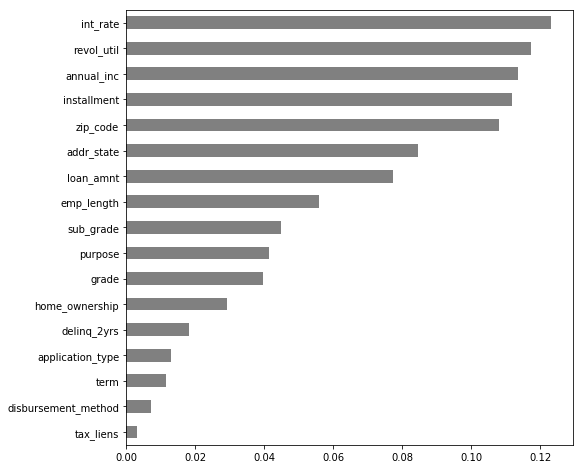

In [60]:
def show_feature_importances(
    pipe, X, y, estimator_name='randomforestclassifier', 
    n=20, figsize=(8, 8)):
    
    # pipe must not change dimensions of X dataframe
    pipe.fit(X, y)
    
    importances = pd.Series(
        pipe.named_steps[estimator_name].feature_importances_, 
        X.columns)

    top_n = importances.sort_values(ascending=False)[:n]
    
    plt.figure(figsize=figsize)
    top_n.sort_values().plot.barh(color='grey')

    
show_feature_importances(pipe, X_train, y_train)

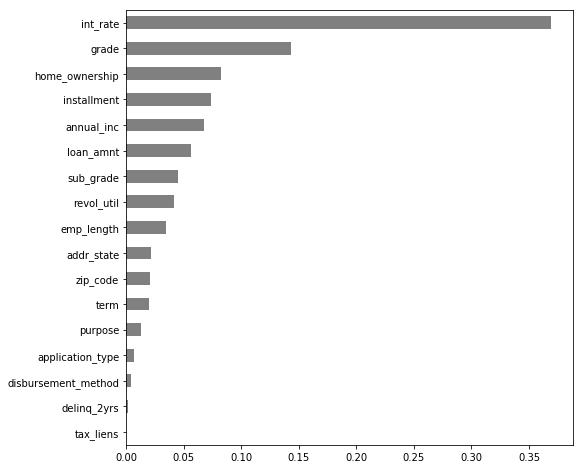

In [61]:
show_feature_importances(rf_pipe, X_train, y_train)

In [65]:
%%time
import eli5
from eli5.sklearn import PermutationImportance

encoder = ce.OrdinalEncoder()
X_train_transformed = encoder.fit_transform(X_train)

model = RandomForestClassifier(
    n_estimators=100, 
    class_weight='balanced', 
    min_samples_leaf=0.005, 
    n_jobs=-1)

model.fit(X_train_transformed, y_train)
permuter = PermutationImportance(model, scoring='roc_auc', n_iter=1, cv='prefit')
permuter.fit(X_train_transformed, y_train)

CPU times: user 8.52 s, sys: 297 ms, total: 8.81 s
Wall time: 3.51 s


In [66]:
eli5.show_weights(permuter, top=None, feature_names=X_train_transformed.columns.tolist())

Weight,Feature
0.0871 ± 0.0000,int_rate
0.0307 ± 0.0000,home_ownership
0.0193 ± 0.0000,installment
0.0175 ± 0.0000,grade
0.0168 ± 0.0000,annual_inc
0.0112 ± 0.0000,loan_amnt
0.0083 ± 0.0000,emp_length
0.0070 ± 0.0000,revol_util
0.0055 ± 0.0000,addr_state
0.0043 ± 0.0000,sub_grade


In [67]:
subset = X_train.columns[permuter.feature_importances_ > 0]
cross_val_score(pipe, X_train[subset], y_train, cv=5, scoring='roc_auc', verbose=10)

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................ , score=0.705489165339481, total=   7.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s remaining:    0.0s


[CV] ....................... , score=0.6969194008000019, total=   1.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.2s remaining:    0.0s


[CV] ....................... , score=0.6875079025139331, total=   1.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.2s remaining:    0.0s


[CV] ....................... , score=0.6914085323187266, total=   1.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   10.4s remaining:    0.0s


[CV] ....................... , score=0.7013523353450538, total=   1.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.5s finished


array([0.70548917, 0.6969194 , 0.6875079 , 0.69140853, 0.70135234])

In [33]:
X_train.head()

,grade,sub_grade,home_ownership,addr_state,zip_code,disbursement_method,application_type,int_rate,revol_util,emp_length,loan_amnt,term,installment,annual_inc,purpose,tax_liens,delinq_2yrs
825,A,A2,MORTGAGE,NC,287xx,Cash,Individual,6.07,6.1,1.0,2500,36.0,76.14,33000.0,debt_consolidation,0,0
34139,A,A5,RENT,NJ,073xx,Cash,Individual,8.08,24.5,2.0,6000,36.0,188.24,92000.0,debt_consolidation,0,0
16149,E,E5,MORTGAGE,FL,328xx,Cash,Joint App,27.27,59.5,10.0,12000,60.0,368.37,52000.0,debt_consolidation,0,1
17819,E,E2,RENT,MA,023xx,Cash,Individual,24.37,53.0,8.0,18900,60.0,547.79,42000.0,debt_consolidation,0,0
23492,A,A5,MORTGAGE,PA,190xx,Cash,Individual,7.96,15.3,1.0,40000,36.0,1252.72,160000.0,house,0,1


# XGB Boosting

In [93]:
train_f = pd.read_csv("../train_features.csv")
test_f = pd.read_csv("../test_features.csv")
train_l = pd.read_csv("../train_labels.csv")
x = pd.concat([train_f,train_l["charged_off"]], axis=1)


In [35]:
ord_mapping = [{'col': 'grade', 'mapping': [("G", 0), ("F", 1), ("E", 2), ("D",3),("C",4),("B",5),("A",6)]},
              {"col" : 'sub_grade', "mapping" : [("G5", 0 ), ("G4",1), ("G3",2),("G2",3),("G1",4),
                                                ("F5", 5 ), ("F4",6), ("F3",7),("F2",8),("F1",9),
                                                ("E5", 10 ), ("E4",11), ("E3",12),("E2",13),("E1",14),
                                                ("D5", 15 ), ("D4",16), ("D3",17),("D2",18),("D1",19),
                                                ("C5", 20 ), ("C4",21), ("C3",22),("C2",23),("C1",24),
                                                ("B5", 25 ), ("B4",26), ("B3",27),("B2",28),("B1",29),
                                                ("A5", 30 ), ("A4",31), ("A3",32),("A2",33),("A1",34),
                                                ]}]

In [55]:
xgb_encoder = ce.OrdinalEncoder(handle_unknown='ignore', cols=['grade','subgrade'], mapping=ord_mapping)
X_train_tf=xgb_encoder.fit_transform(X_train)
xgb_encoder = ce.BinaryEncoder(handle_unknown='ignore',cols=['home_ownership','addr_state', 'zip_code','disbursement_method',
                                                                'application_type','purpose'])
X_train_tf=xgb_encoder.fit_transform(X_train_tf)
X_train_tf

,home_ownership_0,home_ownership_1,home_ownership_2,addr_state_0,addr_state_1,addr_state_2,addr_state_3,addr_state_4,addr_state_5,addr_state_6,zip_code_0,zip_code_1,zip_code_2,zip_code_3,zip_code_4,zip_code_5,zip_code_6,zip_code_7,zip_code_8,zip_code_9,zip_code_10,disbursement_method_0,disbursement_method_1,application_type_0,application_type_1,purpose_0,purpose_1,purpose_2,purpose_3,purpose_4,grade,sub_grade,int_rate,revol_util,emp_length,loan_amnt,term,installment,annual_inc,tax_liens,delinq_2yrs
825,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,6,33,6.07,6.1,1.0,2500,36.0,76.14,33000.0,0,0
34139,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,6,30,8.08,24.5,2.0,6000,36.0,188.24,92000.0,0,0
16149,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,2,10,27.27,59.5,10.0,12000,60.0,368.37,52000.0,0,1
17819,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,2,13,24.37,53.0,8.0,18900,60.0,547.79,42000.0,0,0
23492,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,6,30,7.96,15.3,1.0,40000,36.0,1252.72,160000.0,0,1
34900,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,4,22,14.08,80.3,10.0,30000,36.0,1026.50,100000.0,0,0
34179,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,1,4,20,16.46,38.1,0.0,10000,60.0,245.64,47658.0,0,0
25289,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,6,31,7.34,12.9,9.0,15000,36.0,465.50,68000.0,0,1
3907,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,5,26,11.55,8.8,10.0,30000,36.0,990.00,70000.0,0,0
28140,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,5,26,11.55,48.1,2.0,40000,60.0,880.71,90000.0,0,1


In [53]:
X_train_tf.head()

,home_ownership_0,home_ownership_1,home_ownership_2,addr_state_0,addr_state_1,addr_state_2,addr_state_3,addr_state_4,addr_state_5,addr_state_6,zip_code_0,zip_code_1,zip_code_2,zip_code_3,zip_code_4,zip_code_5,zip_code_6,zip_code_7,zip_code_8,zip_code_9,zip_code_10,disbursement_method_0,disbursement_method_1,application_type_0,application_type_1,purpose_0,purpose_1,purpose_2,purpose_3,purpose_4,grade,sub_grade,int_rate,revol_util,emp_length,loan_amnt,term,installment,annual_inc,tax_liens,delinq_2yrs
825,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,A,A2,6.07,6.1,1.0,2500,36.0,76.14,33000.0,0,0
34139,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,A,A5,8.08,24.5,2.0,6000,36.0,188.24,92000.0,0,0
16149,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,E,E5,27.27,59.5,10.0,12000,60.0,368.37,52000.0,0,1
17819,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,E,E2,24.37,53.0,8.0,18900,60.0,547.79,42000.0,0,0
23492,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,A,A5,7.96,15.3,1.0,40000,36.0,1252.72,160000.0,0,1


In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [72]:
from xgboost import XGBClassifier

model = XGBClassifier()

xgb1_pipe = make_pipeline(
    ce.HashingEncoder(cols=['addr_state', 'zip_code']),
    ce.OrdinalEncoder(handle_unknown='ignore', cols=['grade','subgrade'], mapping=ord_mapping), 
    ce.BinaryEncoder(handle_unknown='ignore',cols=['home_ownership','disbursement_method','application_type','purpose']),
    
    XGBClassifier()
)

cross_val_score(xgb_pipe, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)

array([0.8531457 , 0.85298013, 0.85347682, 0.85409076, 0.85326267])

In [77]:
xgb_pipe.fit(X_train,y_train)
y_test_predict = xgb_pipe.predict_proba(x_test[["grade","sub_grade","home_ownership","addr_state","zip_code","disbursement_method",
       "application_type", "int_rate", "revol_util", "emp_length", "loan_amnt","term","installment",
      "annual_inc","purpose","tax_liens", "delinq_2yrs"]])

In [80]:
sample_submission = pd.read_csv('../sample_submission.csv')
submission = sample_submission.copy()
submission['charged_off'] =y_test_predict[:,1]
submission.to_csv('submission-001.csv', index=False)

In [84]:
import xgboost as xgb
xgb1_pipe = make_pipeline(
    ce.HashingEncoder(cols=['addr_state', 'zip_code']),
    ce.OrdinalEncoder(handle_unknown='ignore', cols=['grade','subgrade'], mapping=ord_mapping), 
    ce.BinaryEncoder(handle_unknown='ignore',cols=['home_ownership','disbursement_method','application_type','purpose'])
)

features = ["grade","sub_grade","home_ownership","addr_state","zip_code","disbursement_method",
       "application_type", "int_rate", "revol_util", "emp_length", "loan_amnt","term","installment",
      "annual_inc","purpose","tax_liens", "delinq_2yrs"]
X_train_xgb = xgb1_pipe.fit_transform(X_train[features])
X_test_xgb = xgb1_pipe.fit_transform(X_test[features])
dtrain = xgb.DMatrix(X_train_xgb, label=y_train)
dtest = xgb.DMatrix(X_test_xgb, label=y_test)

In [85]:
params = {'monotone_constraints': '(0)', # no constraint
          'max_depth': 2,
          'eta': 0.1,
          'silent': 1, 
          'n_jobs': -1,
          'seed': 0,
          'eval_metric': 'rmse',
         'tree_method':'gpu_hist'}

# Without early stopping
bst_cv = xgb.cv(params, dtrain, num_boost_round=1000, nfold=5, early_stopping_rounds=None, as_pandas=True)

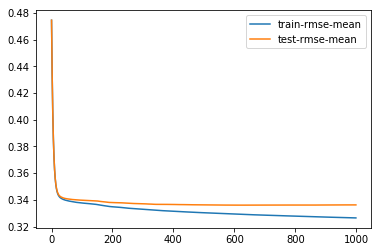

In [86]:
bst_cv[['train-rmse-mean', 'test-rmse-mean']].plot();

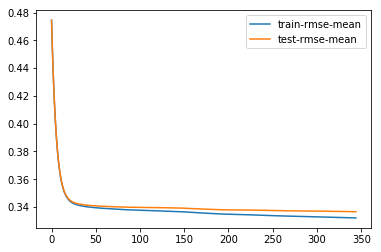

In [87]:
bst_cv = xgb.cv(params, dtrain, num_boost_round=1000, nfold=5, early_stopping_rounds=10, as_pandas=True)
bst_cv[['train-rmse-mean', 'test-rmse-mean']].plot();

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def partial_dependency(bst, X, y, feature):
    """
    Calculate the dependency (or partial dependency) of a response variable on a predictor (or multiple predictors)
    1. Sample a grid of values of a predictor.
    2. For each value, replace every row of that predictor with this value, calculate the average prediction.
    """

    X_temp = X.copy()
    
    grid = np.linspace(start=np.percentile(X_temp[feature], 0.1),
                       stop=np.percentile(X_temp[feature], 99.5),
                       num=50)
    
    y_pred = np.zeros(len(grid))

    for i, value in enumerate(grid):
        X_temp[feature] = value
        data = xgb.DMatrix(X_temp)
        y_pred[i] = np.average(bst.predict(data, ntree_limit=bst.best_ntree_limit))

    plt.plot(grid, y_pred, '-', color='red', linewidth=2.5)
    plt.plot(X, y, 'o', color='grey', alpha=0.01)
    plt.xlim(min(grid), max(grid))
    plt.xlabel(feature)
    plt.ylabel(y.name)
    plt.show()

[0]	eval-rmse:0.341592


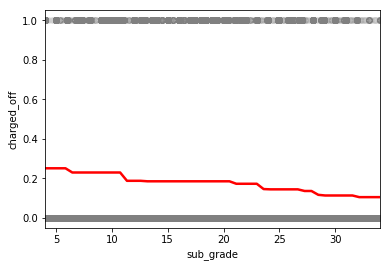

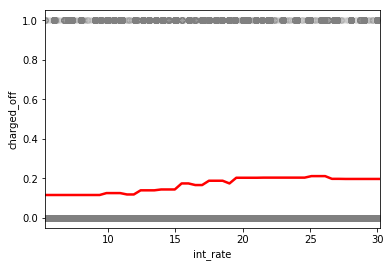

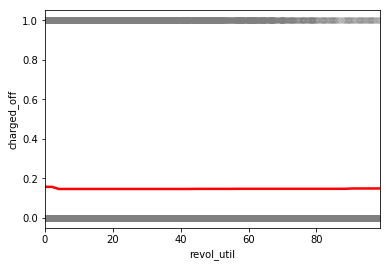

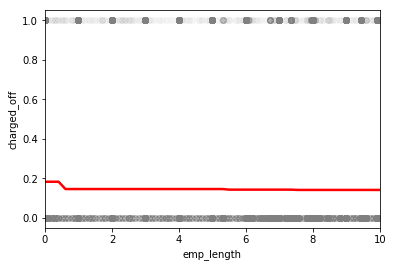

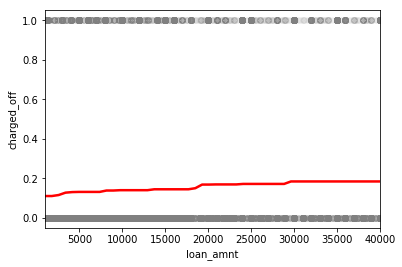

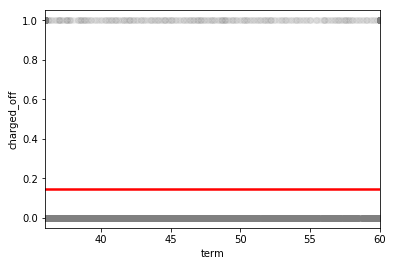

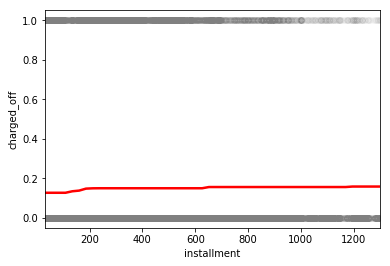

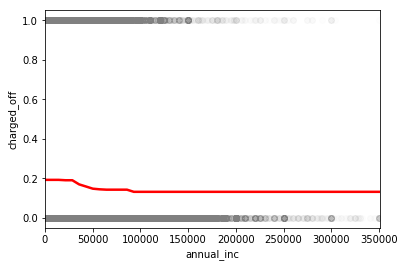

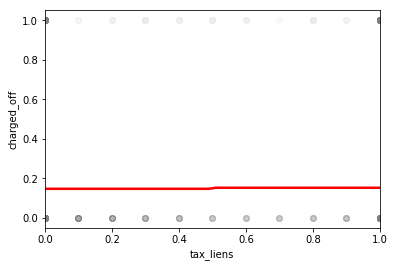

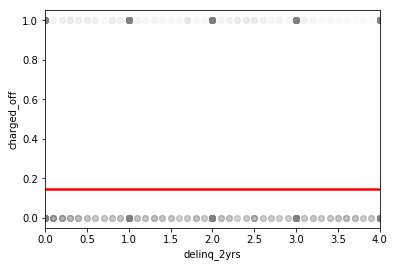

In [96]:
features = ["sub_grade","int_rate", "revol_util", "emp_length", "loan_amnt","term","installment",
      "annual_inc","tax_liens", "delinq_2yrs"]
#params['monotone_constraints'] = '(-1, 1, 0,0,1,0,1,-1,1,0)'


dtrain = xgb.DMatrix(X_train_xgb, label=y_train)
dtest = xgb.DMatrix(X_test_xgb, label=y_test)

bst = xgb.train(params, dtrain, num_boost_round=60)
print(bst.eval(dtest))

for feature in features:
    partial_dependency(bst, X_train_xgb, y_train, feature=feature)